In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

## Resizing the dataset 

In [ ]:
from PIL import Image
import os, sys

main_path = "D:/18201142/dataset/OCT" + "/train"
# main_path = "C:/Users/18201142/Downloads/OCT2017" + "/test"


def directory(path: str):
    if not os.path.exists(path):
        os.mkdir(path)
        print(f"* Created directory: {path}")


def resize_images(img_path: str, out_path: str):
    directory(out_path)
    for img in os.listdir(img_path):
        img_file = f"{img_path}/{img}"
        if os.path.isfile(img_file):
            im = Image.open(img_file)
            imResize = im.resize((28,28),Image.ANTIALIAS)
            imResize.save(f"{out_path}/{img}", "JPEG", quality=100)
    print(f"***** Completed Resizing Images *****")


for label in os.listdir(main_path):
    output_path = f"{main_path+'_resized'}"
    directory(f"{output_path}")
    resize_images(f"{main_path}/{label}", f"{output_path}/{label}")

* Created directory: D:/18201142/dataset/OCT/train_resized
* Created directory: D:/18201142/dataset/OCT/train_resized/CNV


C:\Users\18201142\AppData\Local\Temp\ipykernel_23780\3259341809.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = im.resize((28,28),Image.ANTIALIAS)


***** Completed Resizing Images *****
* Created directory: D:/18201142/dataset/OCT/train_resized/DME
***** Completed Resizing Images *****
* Created directory: D:/18201142/dataset/OCT/train_resized/DRUSEN
***** Completed Resizing Images *****
* Created directory: D:/18201142/dataset/OCT/train_resized/NORMAL
***** Completed Resizing Images *****


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pandas as pd

COMPRESSED = True
image_dataset_dir = r"D:/18201142/dataset/OCT/train_resized"
new_dataset_folder = r"C:/Users/18201142/Downloads/OCT/train_to_npz" + "_compressed" if COMPRESSED else ""

dataset = {
    "image" :[],
    "label" : []
}

for label in os.listdir(image_dataset_dir):
    images_dir = f"{image_dataset_dir}/{label}"
    if not os.path.isdir(images_dir):
        continue
    for image_file in os.listdir(images_dir):
        if not image_file.endswith(".jpeg"):
            continue
        img = load_img(os.path.join(image_dataset_dir, label, image_file))
        x = img_to_array(img)

        rel_path = label + "/" + os.path.splitext(image_file)[0] + '.npz'
        os.makedirs(new_dataset_folder + "/" + label, exist_ok=True)
        npz_file = os.path.join(new_dataset_folder, rel_path)
        # True: Compressed, False: UnCompressed
        if COMPRESSED:
            np.savez_compressed(npz_file, x)
        else:
            np.savez(npz_file, x)
        dataset["image"].append(rel_path)
        dataset["label"].append(label)
    print(f"* Converted to {images_dir} `.npz`")


df = pd.DataFrame(dataset)
df.to_csv(os.path.join(new_dataset_folder, "train.csv"), index=False)

print('Dataset converted to npz and saved here at %s '%new_dataset_folder)

df.head()

* Converted to D:/18201142/dataset/OCT/train_resized/CNV `.npz`
* Converted to D:/18201142/dataset/OCT/train_resized/DME `.npz`
* Converted to D:/18201142/dataset/OCT/train_resized/DRUSEN `.npz`
* Converted to D:/18201142/dataset/OCT/train_resized/NORMAL `.npz`
Dataset converted to npz and saved here at C:/Users/18201142/Downloads/OCT/train_to_npz_compressed 


,image,label
0,CNV/CNV-4612183-46.npz,CNV
1,CNV/CNV-4612183-47.npz,CNV
2,CNV/CNV-4612183-48.npz,CNV
3,CNV/CNV-4612183-49.npz,CNV
4,CNV/CNV-4612183-50.npz,CNV


## Test dataset

In [ ]:
from PIL import Image
import os, sys

main_path = "D:/18201142/dataset/OCT2017" + "/test"

def directory(path: str):
    if not os.path.exists(path):
        os.mkdir(path)
        print(f"* Created directory: {path}")


def resize_images(img_path: str, out_path: str):
    directory(out_path)
    for img in os.listdir(img_path):
        img_file = f"{img_path}/{img}"
        if os.path.isfile(img_file):
            im = Image.open(img_file)
            imResize = im.resize((256,256),Image.ANTIALIAS)
            imResize.save(f"{out_path}/{img}", "JPEG", quality=100)
    print(f"***** Completed Resizing Images *****")


for label in os.listdir(main_path):
    output_path = f"{main_path+'_resized'}"
    directory(f"{output_path}")
    resize_images(f"{main_path}/{label}", f"{output_path}/{label}")

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pandas as pd

COMPRESSED = True
image_dataset_dir = r"D:/18201142/dataset/OCT2017/test_resized"
new_dataset_folder = r"C:/Users/18201142/Downloads/OCT2017/test_to_npz" + "_compressed" if COMPRESSED else ""

dataset = {
    "image" :[],
    "label" : []
}

for label in os.listdir(image_dataset_dir):
    images_dir = f"{image_dataset_dir}/{label}"
    if not os.path.isdir(images_dir):
        continue
    for image_file in os.listdir(images_dir):
        if not image_file.endswith(".jpeg"):
            continue
        img = load_img(os.path.join(image_dataset_dir, label, image_file))
        x = img_to_array(img)

        rel_path = label + "/" + os.path.splitext(image_file)[0] + '.npz'
        os.makedirs(new_dataset_folder + "/" + label, exist_ok=True)
        npz_file = os.path.join(new_dataset_folder, rel_path)
        # True: Compressed, False: UnCompressed
        if COMPRESSED:
            np.savez_compressed(npz_file, feature=x)
        else:
            np.savez(npz_file, x)
        dataset["image"].append(rel_path)
        dataset["label"].append(label)
    print(f"* Converted to {images_dir} `.npz`")


df = pd.DataFrame(dataset)
df.to_csv(os.path.join(new_dataset_folder, "test.csv"), index=False)

print('Dataset converted to npz and saved here at %s '%new_dataset_folder)

df.head()

## Splitting the dataset into Training and testing

In [ ]:
from os import listdir, path

import cv2
import numpy as np

# root_dir = "/content/drive/MyDrive/Colab Notebook Files/OCT2017"
root_dir = "D:/18201142/dataset/OCT"
out_dir = "C:/Users/18201142/Downloads/OCT"

label_to_int = {
    "CNV": 0,
    "DME": 1,
    "DRUSEN": 2,
    "NORMAL": 3,
}

X_train = []
y_train = []
X_test = []
y_test = []

for target in listdir(root_dir):
    # target: "test" or "train" directory
    if not "resized" in target:
        continue
    dir_lvl_1 = f"{root_dir}/{target}"
    print(f"* Visiting : `{target}`")
    if path.isfile(dir_lvl_1):
        continue
    for label in listdir(dir_lvl_1):
        # label: "CNV" or "DME" or "DRUSEN" or "NORMAL"
        dir_lvl_2 = f"{dir_lvl_1}/{label}"
        print(f"* Visiting : `{target}/{label}`")
        for file in listdir(f"{dir_lvl_2}"):
            # print(f"* Reading : `{target}/{label}/{file}`")
            img = cv2.imread(f"{dir_lvl_2}/{file}", cv2.IMREAD_GRAYSCALE)
            if "test" in target:
                X_test.append(img)
                y_test.append(label_to_int[label])
            elif "train" in target:
                X_train.append(img)
                y_train.append(label_to_int[label])

X_train = np.array(X_train, dtype=np.uint8)
y_train = np.array(y_train, dtype=np.uint8)
X_test = np.array(X_test, dtype=np.uint8)
y_test = np.array(y_test, dtype=np.uint8)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

np.savez_compressed(out_dir + "/thesis-dataset.npz", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(f"* Created `thesis-dataset.npz` in `{out_dir}`")

* Visiting : `train_resized`
* Visiting : `train_resized/CNV`
* Visiting : `train_resized/DME`
* Visiting : `train_resized/DRUSEN`
* Visiting : `train_resized/NORMAL`
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (0,)
y_test: (0,)
* Created `thesis-dataset.npz` in `C:/Users/18201142/Downloads/OCT`


In [ ]:
import numpy as np

# root_dir = "/content/drive/MyDrive/Colab Notebook Files/OCT2017"
root_dir = "D:/18201142/dataset/OCT"
out_dir = "C:/Users/18201142/Downloads/OCT"

data = np.load(out_dir + "/thesis-dataset.npz")
for k, v in data.items():
    print(k, data[k].shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (0,)
y_test (0,)


# Spliting the dataset 

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf

from IPython import display

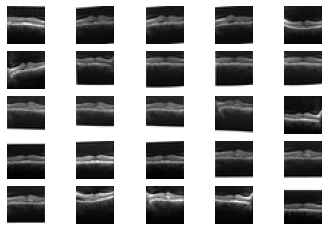

In [ ]:
from matplotlib import pyplot

train_img = data.get('X_train')

for i in range(25):
    pyplot.subplot(5,5,1+i)
    pyplot.axis('off')
    pyplot.imshow(train_img[i], cmap='gray')
pyplot.show()

In [ ]:
train_labels = data.get('y_train')

In [ ]:
print(type(train_img))

<class 'numpy.ndarray'>


In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
train_img = train_img.reshape(train_img.shape[0],28,28,1).astype('float32')
train_img = (train_img - 127.5)/127.5

In [ ]:
train_img.shape

(60000, 28, 28, 1)

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_img).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


# The Generator 

- input 7*7*256 (low resolution version of the output image)
- outputs a single 28×28 grayscale image
- this generator takes a vector of size 100 and first reshape that into (7, 7, 128) vector then applied transpose 
- convolution in combination with batch normalization. 

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

   # upsample to 14x14
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # upsample to 28x28
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

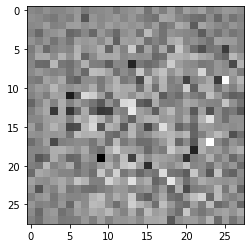

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100]) #latent space
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

# The Discriminator

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1])) #2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')) #downsampling  2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())  # classifier real (class=1) or fake (class=0))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

# The loss and optimizer

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator loss

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Genarator loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16


seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF 
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

# Train the model

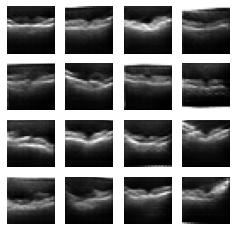

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

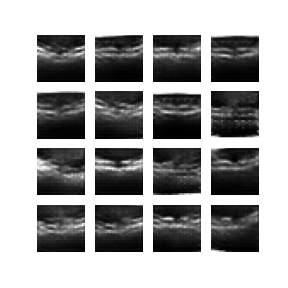

In [ ]:
display_image(10)